In [1]:
import numpy as np
import scipy.stats as st
from scipy.optimize import curve_fit #we use this for fitting a line
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator#we use this for adding minor ticks

In [2]:
#this is a function which calculates value of chi-squared AFTER you have performed a linear fit

#x, y, and y_err are arrays
#model is a function; for example: def f(x, A, B): return A*x+B
#parameters is a list of your parameters; for example: [A, B]

def chi_squared_np(x, y, y_err, model, parameters):
    chi2 = np.sum(np.square(y - model(x, *parameters)) / np.square(y_err))  #calculate chi-squared
    dof = len(x) - len(parameters)  #find out the degrees of freedom
    rchi2 = chi2 / dof  #find normalised chi squared
    p = 1 - st.chi2.cdf(chi2, dof)   #find the p-value corresponding to the chi squared
    return chi2, rchi2, p

#next we will define a model for the fit, this is just an equation for a line
linmodel = lambda x, slope, intercept: x * slope + intercept

In [3]:
#in this block we will input our x data, y data, and uncertainties in y data.
#np.random DO NOT USE! only used to generate random example data here\
#REPLACE WITH YOUR OWN DATA

#example x_data
#x_data = np.array([20, 50, 150, 200, ...]) #mass (g)

x_data = np.array([0.5213, 1.0282, 1.4424, 1.8333, 2.2261]) #description (units)
y_data = np.array([0.1, 0.2, 0.3, 0.4, 0.5]) #description (units)
x_uncert = np.array([0.0007, 0.001, 0.0012, 0.0014, 0.0015])
y_uncert = np.array([0.001, ] * 5)  #description (units)

In [4]:
#now let's perform a linear fit on our data by using curve_fit and extract slope and intercept

fit_params = curve_fit(linmodel, x_data, y_data, sigma=y_uncert)[0]
#above returns the first result (indicated by the '[0]') of the fit, namely the slope and intercept

#now we input the results of the fit and our data into the chi-sqrd calculating function
chisqrd, norm_chisqrd, pval = chi_squared_np(x_data, y_data, y_uncert, linmodel, fit_params)

Text(0.5, -0.2, 'Linear fit of data with $\\chi^2$/dof = 101.78')

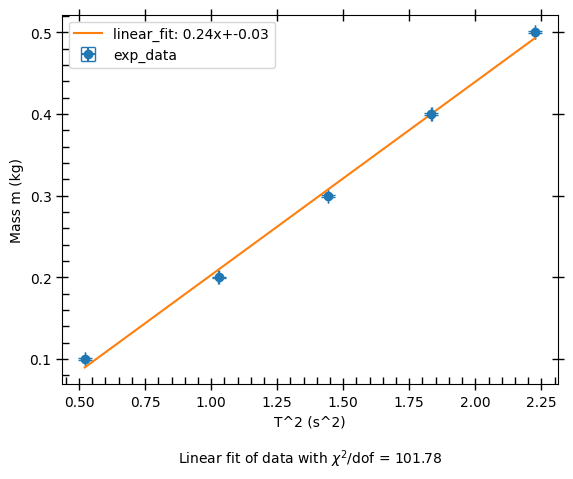

In [9]:
#now we plot our data points and the fit!

fig, ax = plt.subplots()
ax.errorbar(x_data, y_data, yerr=y_uncert, xerr = x_uncert, linestyle='None', fmt='o', capsize = 5, label='exp_data')
ax.tick_params(bottom=True, top=True, left=True, right=True)

#ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.minorticks_on()
ax.tick_params(which='major', length=8, width=1, direction='inout')
ax.tick_params(which='minor', length=5, width=1, direction='in')
#plt.rcParams['text.usetex'] = True
ax.set_xlabel(r"T^2 (s^2)")
ax.set_ylabel("Mass m (kg)")
ax.plot(x_data, fit_params[0]*x_data + fit_params[1], label='linear_fit: {:.2f}x+{:.2f}'.format(fit_params[0], fit_params[1]))
plt.legend()
plt.text(0.5, -0.2, r"Linear fit of data with $\chi^2$/dof = %1.2f" %(norm_chisqrd), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)